In [1]:
import numpy as np
import copy as copy
from scipy.linalg import toeplitz, block_diag
import matplotlib.pyplot as plt
import time
import mat_equil

In [2]:
np.random.seed(1)
m = 3000
N = 500
max_size = 20 # maximum size of each block
n_list = [np.random.randint(max_size+1) for i in range(N)] # list of variable block sizes n_i
n = np.sum(n_list) # total variable dimension = n_1 + ... + n_N
A = np.random.randn(m, n)
tol = 1e-3 # tolerance for terminating the equilibration
max_iter = 10000 # maximum number of iterations for terminating the equilibration

In [3]:
d, e, B, k = mat_equil.mat_equil(A, n_list, tol, max_iter)

In [4]:
print('[Sanity Check]')
print('len(d) = {}, len(e) = {}, iter number = {}'.format(len(d), len(e), k))
print('mean(d) = {}, mean(e) = {}'.format(np.mean(d), np.mean(e)))
print('\|A\|_2 = {}, \|DAE\|_2 = {}'.format(np.linalg.norm(A), np.linalg.norm(B)))
print('min(|A|) = {}, max(|A|) = {}, mean(|A|) = {}'.format(np.min(np.abs(A)), 
                                                            np.max(np.abs(A)), np.average(np.abs(A))))
print('min(|B|) = {}, max(|B|) = {}, mean(|B|) = {}'.format(np.min(np.abs(B)), 
                                                            np.max(np.abs(B)), np.average(np.abs(B))))

[Sanity Check]
len(d) = 3000, len(e) = 500, iter number = 1744
mean(d) = 2892.9943007429074, mean(e) = 2892.994300742908
\|A\|_2 = 3870.5836125223336, \|DAE\|_2 = 22.36067977499804
min(|A|) = 1.2572962906243097e-07, max(|A|) = 5.359333726090027, mean(|A|) = 0.7978231252387761
min(|B|) = 6.726502378087701e-10, max(|B|) = 0.08047149195716236, mean(|B|) = 0.004409892310085932


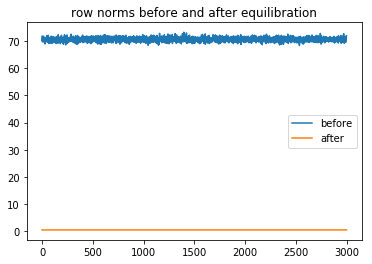

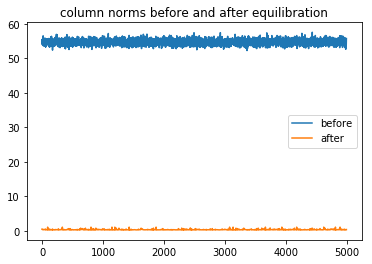

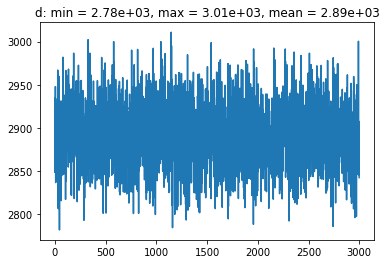

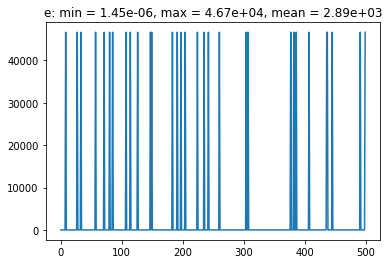

In [5]:
# row norms
A_norms_r = np.sqrt((A**2).dot(np.ones(n))) 
B_norms_r = np.sqrt((B**2).dot(np.ones(n))) 
#scale_r = np.mean(A_norms_r) / np.mean(B_norms_r)
#A_norms_r = A_norms_r / scale_r

# column norms
A_norms_c = np.sqrt(np.ones(m).dot(A**2))
B_norms_c = np.sqrt(np.ones(m).dot(B**2))
#scale_c = np.mean(A_norms_c) / np.mean(B_norms_c)
#A_norms_c = A_norms_c / scale_c

# visualization of row norms
plt.plot(A_norms_r)
plt.plot(B_norms_r)
plt.title('row norms before and after equilibration')
plt.legend(['before', 'after'])
plt.show()

# visualization of column norms
plt.plot(A_norms_c)
plt.plot(B_norms_c)
plt.title('column norms before and after equilibration')
plt.legend(['before', 'after'])
plt.show()

# visualization of left scaling d
plt.plot(d)
plt.title('d: min = {:.3}, max = {:.3}, mean = {:.3}'.format(np.min(d), np.max(d), np.average(d)))
plt.show()

# visualization of right scaling e
plt.plot(e)
plt.title('e: min = {:.3}, max = {:.3}, mean = {:.3}'.format(np.min(e), np.max(e), np.average(e)))
plt.show()